<a href="https://colab.research.google.com/github/agostinacoppola/ProyectoFinalDS_Coppola/blob/main/ProyectoFinalDS_Coppola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final: "Loans Default"**

**Abstract con motivación y audiencia**

El presente trabajo se enfoca en analizar un conjunto de datos relacionado con los préstamos otorgados por una institución financiera a sus clientes. Dicho dataset contiene información sobre las condiciones particulares de los préstamos como así también información personal de los prestatarios.

El objetivo es realizar un aprendizaje supervisado de clasificación para predecir si los préstamos serán reembolsados o no por los prestatarios en el plazo pactado. Se plantea que ciertas características personales de los clientes como así también de los préstamos mismos puedan influir en el cumplimiento o incumpliento de los pagos. Se analizarán las variables que se consideren relevantes para el estudio y, mediante el análisis exploratorio de datos (EDA), se buscará obtener insights valiosos que contribuyan a lograr el objetivo.

Además, se analizarán varios algoritmos de Machine Learning, como Regresión Logística, Árbol de Decisión, Random Forest y K-Nearest Neighbors y se compararán los resultados obtenidos con el fin de determinar cuál ofrece un mejor rendimiento para predecir si los prestatarios cumplirán o no con sus obligaciones de pago.


Este proyecto esta destinado a toda institución que, entre sus servicios, brinde a sus clientes préstamos financieros independientemente de cuál sea el fin de los mismos.

La importancia del modelo y, motivo por el cual se eligió este tema, radica en poder contribuir con dichas instituciones en la prevención de las posibles contingencias económicas que se deriven del incumplimiento por parte de sus clientes.

**Contexto Comercial y Analítico**

Las instituciones financieras desempeñan un papel crucial en la economía al otorgar préstamos a individuos y empresas. Sin embargo, un riesgo importante para estas instituciones es el incumplimiento de los préstamos, cuando los prestatarios no pagan sus obligaciones.

Para mitigar este riesgo, el aprendizaje automático brindará a las instituciones financieras herramientas necesarias para poder predecir e identificar a los prestatarios que representan un mayor riesgo y tomar decisiones anticipadas que permitan reducir al mínimo las contingencias económicas que acarrearían los incumplimientos.

Mediante el análisis exploratorio de datos (EDA) se buscará revelar patrones, correlaciones y tendencias existentes en el conjunto de datos y se utilizarán visualizaciones para facilitar la interpretación de los resultados.

El DataFrame consta de 255.362 entradas y 18 columnas. Las variables incluyen información sobre los prestatarios como edad, ingreso anual, educación, estado civil, cantidad de líneas de crédito y antiguedad en el empleo e información sobre los préstamos como importe, plazo, tasa de interés y propósito de los mismos.

**Preguntas/hipótesis a resolver**

¿Cómo se relacionan los factores personales de los prestatarios y las condiciones específicas de los préstamos con el nivel de cumplimiento en el pago de los mismos? ¿Se podrá predecir si en base a determinadas características existe un mayor o menor riesgo de incumplimiento de los préstamos?

**Objetivo**

El trabajo tiene como principal objetivo desarrollar un modelo de Machine Learning que pueda predecir con presición si los préstamos otorgados por una institución financiera serán reembolsados o no por los prestatarios en el plazo que corresponde, en base a diversos factores y características de los mismos.

Para lograr este objetivo se utilizará un enfoque de clasificación binaria y se tomará la variable "Default" como variable objetivo. Esta variable divide a los préstamos en: "0" si el préstamo fue reembolsado y "1" si no lo fue.


# **Lectura de datos**

**Importación de librerías**

In [1]:
# Importación de librerías para manipulación y visualización de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

# Importación de librerías para la implementación de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Lectura del dataset**

In [2]:
loans = pd.read_csv("https://raw.githubusercontent.com/agostinacoppola/Data-Science/main/Loan_default.csv")
loans.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


**Análisis inicial del dataset**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255362 entries, 0 to 255361
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255362 non-null  object 
 1   Age             255362 non-null  int64  
 2   Income          255362 non-null  int64  
 3   LoanAmount      255362 non-null  int64  
 4   CreditScore     255362 non-null  int64  
 5   MonthsEmployed  255362 non-null  int64  
 6   NumCreditLines  255362 non-null  int64  
 7   InterestRate    255362 non-null  float64
 8   LoanTerm        255362 non-null  int64  
 9   DTIRatio        255362 non-null  float64
 10  Education       255362 non-null  object 
 11  EmploymentType  255362 non-null  object 
 12  MaritalStatus   255362 non-null  object 
 13  HasMortgage     255362 non-null  object 
 14  HasDependents   255362 non-null  object 
 15  LoanPurpose     255362 non-null  object 
 16  HasCoSigner     255362 non-null  object 
 17  Default   

In [4]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255362.0,43.498159,14.990183,18.0,31.00,43.00,56.00,69.0
Income,255362.0,82498.947165,38962.936514,15000.0,48826.00,82464.50,116218.75,149999.0
LoanAmount,255362.0,127578.209593,70841.228108,5000.0,66156.00,127555.50,188985.50,249999.0
CreditScore,255362.0,574.262471,158.904433,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255362.0,59.542246,34.643530,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255362.0,2.501018,1.117009,1.0,2.00,2.00,3.00,4.0
InterestRate,255362.0,13.492754,6.636431,2.0,7.77,13.46,19.25,25.0
LoanTerm,255362.0,36.025893,16.969430,12.0,24.00,36.00,48.00,60.0
DTIRatio,255362.0,0.500219,0.230919,0.1,0.30,0.50,0.70,0.9
Default,255362.0,0.116137,0.320390,0.0,0.00,0.00,0.00,1.0


In [5]:
loans.describe(include=['object']).T

,count,unique,top,freq
LoanID,255362,255346,0XUXINAS01,2
Education,255362,4,Bachelor's,64371
EmploymentType,255362,4,Part-time,64164
MaritalStatus,255362,3,Married,85308
HasMortgage,255362,2,Yes,127685
HasDependents,255362,2,Yes,127745
LoanPurpose,255362,5,Business,51301
HasCoSigner,255362,2,Yes,127709


In [6]:
# Tamaño del dataset
loans.shape

(255362, 18)

In [7]:
# Nombre de las variables
loans.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

**Descripción de variables**

- LoanID: unique identifier for each loan.
- Age: the age of the borrower.
- Income: the annual income of the borrower.
- LoanAmount: the amount of money being borrowed.
- CreditScore: the credit score of the borrower, indicating their creditworthiness.
- MonthsEmployed: the number of months the borrower has been employed.
- NumCreditLines: the number of credit lines the borrower has open.
- InteresrRate: the interest rate for the loan.
- LoanTerm: the term length of the loan in months.
- DTIRatio: the Debt-to-Income ratio, indicating the borrower´s debt compared to their income.
- Education: the highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).
- EmploymentType: the type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
- MaritalStatus: the marital status of the borrower (Single, Married, Divorced).
- HasMortgage: whether the borrower has a mortgage (Yes or No).
- HasDependents: whether the borrower has dependents (Yes or No).
- LoanPurpose: the purpose of the loan (Home, Auto, Education, Business, Other).
- HasCoSigner: whether the loan has a co-signer (Yes or No).
- Default: the binary target variable indiciating whether the loan defaulted (1) or not (0).

# **Limpieza y transformación de datos**

**Valores nulos**

In [8]:
loans.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


En el dataset no se encontraron valores nulos. De encontrarlos se tendría que elegir algún método para reemplazarlos o eliminarlos.

**Valores duplicados**

In [9]:
print("Valores duplicados:", loans.duplicated().sum())

Valores duplicados: 16


In [10]:
# Visualizar duplicados
duplicates = loans[loans.duplicated()]
duplicates

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255346,E73OLE575L,47,113896,245661,551,111,3,7.70,48,0.63,Master's,Self-employed,Single,No,No,Education,Yes,0
255347,YTTQB5VWUN,20,56087,10625,761,15,2,11.55,12,0.80,High School,Unemployed,Divorced,Yes,Yes,Education,No,0
255348,MGHILYADA4,62,47258,132960,420,107,3,16.15,36,0.21,Master's,Self-employed,Married,Yes,No,Other,No,0
255349,0XUXINAS01,22,18373,212679,328,33,3,8.53,48,0.69,Bachelor's,Self-employed,Married,Yes,No,Education,Yes,1
255350,B5Z0CFJC9W,58,33346,160792,336,60,1,18.51,12,0.53,High School,Part-time,Single,Yes,No,Home,Yes,0
255351,TD5ZIQR2E2,52,56612,14963,734,106,3,7.06,60,0.81,High School,Unemployed,Single,Yes,Yes,Home,No,0
255352,NM9LQGNVGB,31,66231,152553,822,88,1,7.86,36,0.86,PhD,Full-time,Single,No,No,Auto,No,0
255353,IJ8FMI9PSX,25,141474,220735,366,84,1,17.07,60,0.36,High School,Self-employed,Married,No,No,Other,Yes,1
255354,EAUONEP7II,52,59361,74945,313,58,2,19.42,24,0.47,Bachelor's,Full-time,Divorced,No,No,Auto,Yes,0
255355,A6H0EODSMM,48,53882,121021,711,6,2,4.96,60,0.34,Bachelor's,Part-time,Married,Yes,No,Business,Yes,0


In [11]:
# Eliminar valores duplicadas
loans.drop_duplicates(inplace=True)
print("Valores duplicados:", loans.duplicated().sum())

Valores duplicados: 0


**Valores outliers**

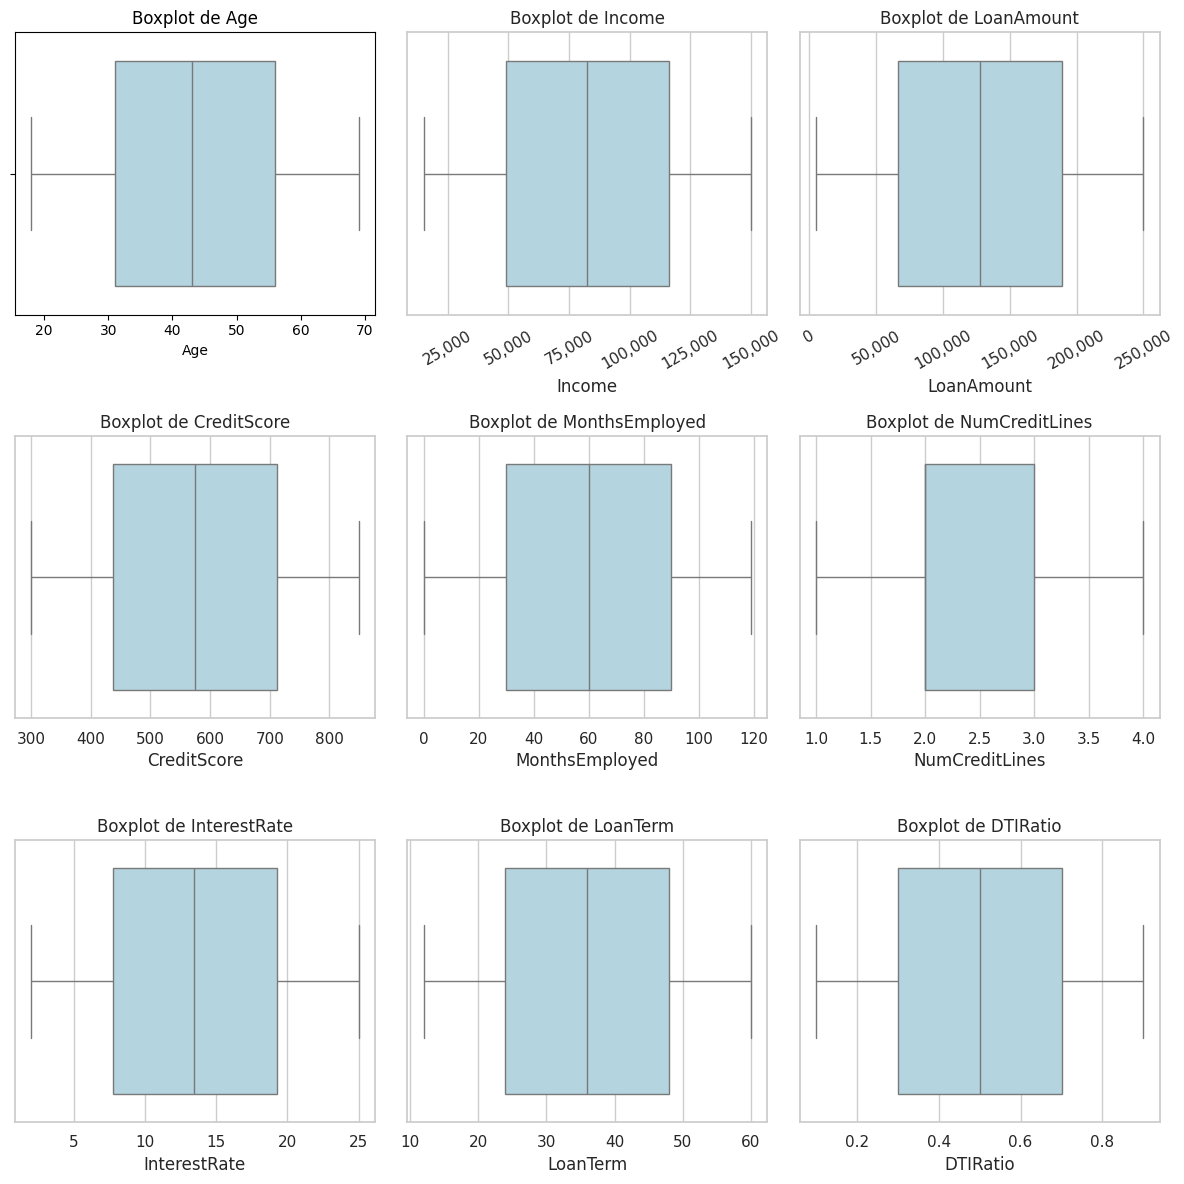

In [12]:
numeric_columns = loans.select_dtypes(include=['int64', 'float64']).drop(columns=['Default'])

# Calcular el número de filas y columnas para los plots
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 4*num_rows))

# Graficar los boxplots para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=loans[col], color="lightblue")
    plt.title("Boxplot de {}".format(col))

    if col in ['Income', 'LoanAmount']:
        plt.tick_params(axis='x', rotation=30)
        plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.tight_layout()

plt.show()

En el dataset no se encontraron outliers. De encontrarlos habría que analizarlos y definir si es conveniente mantenerlos, reemplazarlos o eliminarlos.

# **EDA: Análisis Exploratorio de Datos**

**Distribución Default y Non-Default**

El dataset utilizado contiene mayor cantidad de datos de préstamos reembolsados (Non-Default) y solo un 11,6% de préstamos atrasados (Default). Es probable que esta disparidad genere un desbalanceo de clases que pueda afectar el rendimiento de los modelos que se analizarán más adelante.

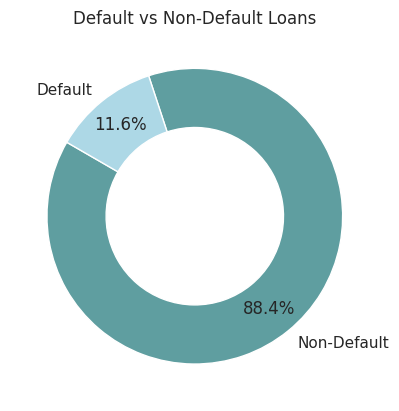

In [13]:
plt.pie(loans['Default'].value_counts(), labels=['Non-Default', 'Default'], autopct='%1.1f%%', colors=['cadetblue','lightblue'], startangle=150, wedgeprops=dict(width=0.4), pctdistance=0.80)
plt.title('Default vs Non-Default Loans')
plt.show()

**¿Existe relacion entre el nivel de cumplimiento y las condiciones particulares de los préstamos?**

La curva naranja representa la densidad de préstamos que están en estado de incumplimiento mientras que la curva azul representa la densidad de préstamos que se encuentran cancelados.

En cuanto al monto de los préstamos, los siguientes gráficos indican que la mayor densidad de incumplimientos corresponde a aquellos préstamos de mayor importe. En cambio, el pico de densidad de los préstamos cumplidos se ubica en aquellos de menor importe.

Algo similar ocurre con la tasa de interés. Las tasas más bajas están asociadas a una mayor cantidad de préstamos reembolsados y, a medida que esta aumenta, la densidad de incumplimiento también se incrementa.

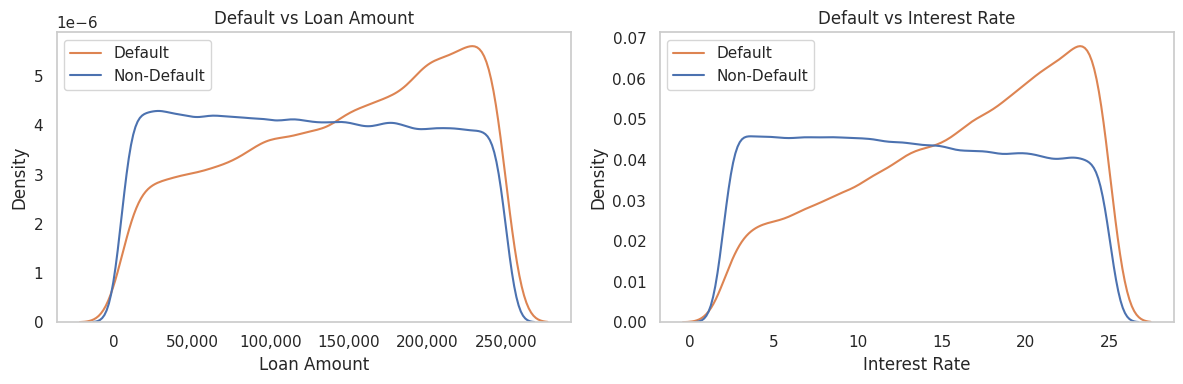

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=loans, x='LoanAmount', hue='Default', fill=False, common_norm=False, ax=axs[0])
sns.kdeplot(data=loans, x='InterestRate', hue='Default', fill=False, common_norm=False, ax=axs[1])

axs[0].set_title('Default vs Loan Amount')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Density')
axs[0].legend(labels=['Default','Non-Default'])
axs[0].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
axs[0].grid(False)

axs[1].set_title('Default vs Interest Rate') # Completa el título
axs[1].set_xlabel('Interest Rate')
axs[1].set_ylabel('Density')
axs[1].legend(labels=['Default','Non-Default'])
axs[1].grid(False)

plt.tight_layout()
plt.show();

**¿Existe relación entre el nivel de cumplimiento y la antiguedad en el trabajo de los prestatarios?**

Los siguientes gráficos indican que existe mayor incumplimiento por parte de los prestatarios que tienen menor antiguedad en el trabajo, y a medida que aumenta la antiguedad se incrementa a su vez el nivel de cumplimiento en el pago de los préstamos. Por ende, la antiguedad en el empleo parece ser un indicador importante del riesgo crediticio de un cliente.

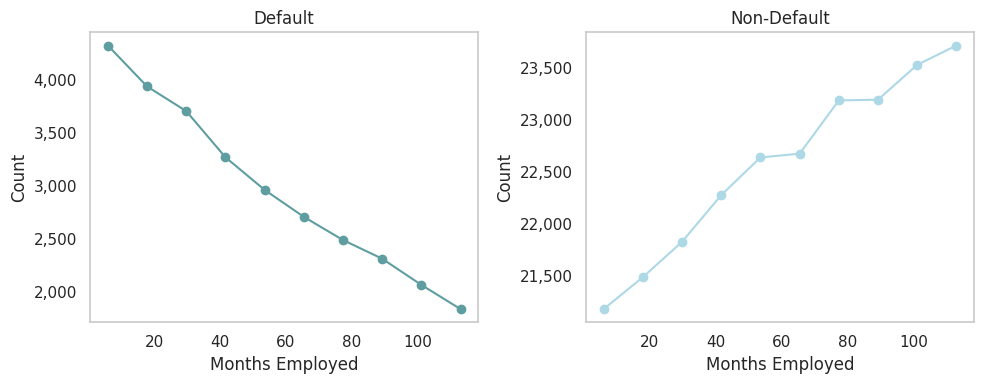

In [15]:
# Calcular valores para Default
hist_values_default, bin_edges_default = np.histogram(loans[loans['Default'] == 1]['MonthsEmployed'], bins=10, density=False)
bin_centers_default = (bin_edges_default[:-1] + bin_edges_default[1:]) / 2

# Calcular valores para Non-Default
hist_values_nondefault, bin_edges_nondefault = np.histogram(loans[loans['Default'] == 0]['MonthsEmployed'], bins=10, density=False)
bin_centers_nondefault = (bin_edges_nondefault[:-1] + bin_edges_nondefault[1:]) / 2

# Crear figura con dos subplots
plt.figure(figsize=(10, 4))

# Gráfico de líneas para Default
plt.subplot(1, 2, 1)
plt.plot(bin_centers_default, hist_values_default, marker='o', linestyle='-', color='cadetblue')
plt.xlabel('Months Employed')
plt.ylabel('Count')
plt.title('Default')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(False)

# Gráfico de líneas para Non-Default
plt.subplot(1, 2, 2)
plt.plot(bin_centers_nondefault, hist_values_nondefault, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Months Employed')
plt.ylabel('Count')
plt.title('Non-Default')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(False)
plt.tight_layout()
plt.show()

**¿Existe relación entre el tipo de empleo y el nivel de educación de los prestatarios en los préstamos que se encuentran en estado "Default"?**

Se puede observar que los prestatarios desempleados tienen una tasa de incumplimiento más alta, seguidos por aquellos con empleos Part-time. Además, la tasa de incumplimiento parece disminuir a medida que aumenta el nivel educativo de los prestatarios, especialmente para aquellos con un empleo Full-time.

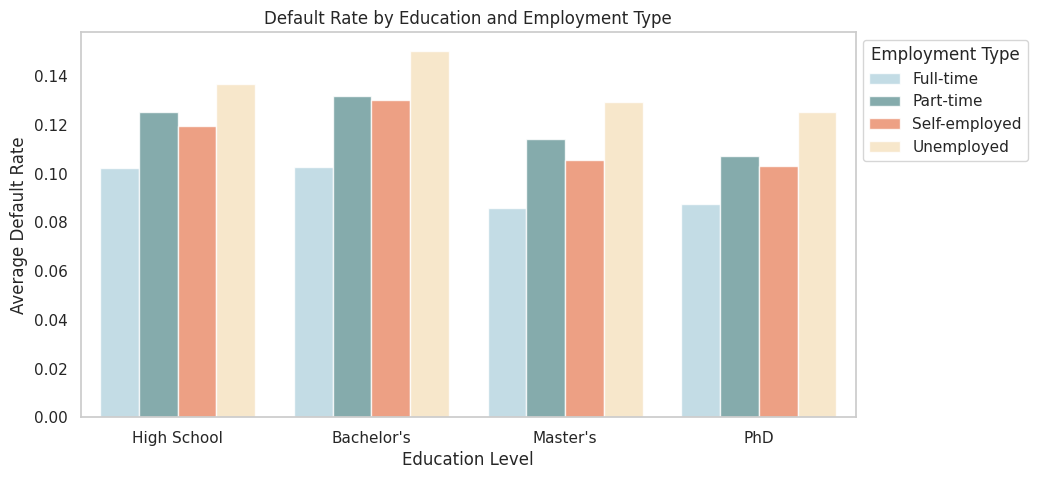

In [16]:
# Agrupar datos de Education y EmploymentType y calcular la tasa de incumplimiento promedio
grouped = loans.groupby(['Education', 'EmploymentType'])['Default'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='Default', hue='EmploymentType', data=grouped, palette=['lightblue', 'cadetblue', 'coral', 'moccasin'], alpha=0.8)
plt.title('Default Rate by Education and Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Average Default Rate')
plt.xticks([0, 1, 2, 3], ['High School', "Bachelor's", "Master's", 'PhD'])
plt.legend(title='Employment Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)
plt.show()

**¿Existe relación entre el nivel de cumplimiento y la edad de los prestatarios?**

A través del siguiente gráfico se puede visualizar que cuanto más jóvenes son los prestatarios mayores son las probabilidades de incumplimiento y, a medida que aumenta la edad, también se incrementa el nivel de cumplimiento en el pago de los préstamos.

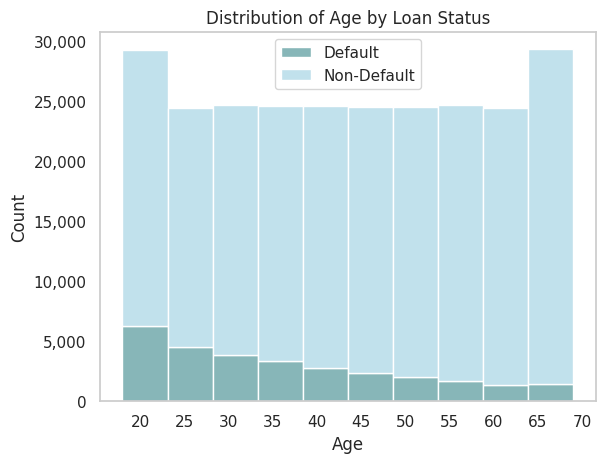

In [17]:
ax = sns.histplot(data=loans, x="Age", hue="Default", multiple="stack", bins=10, palette=['lightblue', 'cadetblue'])
plt.title('Distribution of Age by Loan Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Default','Non-Default'])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.grid(False)
plt.show()

**¿Existe relación entre el nivel de cumplimiento y los ingresos anuales de los prestatarios?**

Los prestatarios con menores ingresos tienden a incumplir más en el pago de sus préstamos, mientras que para aquellos con ingresos medios y altos, al tener una mayor estabilidad financiera, el nivel de incumplimiento se reduce considerablemente.



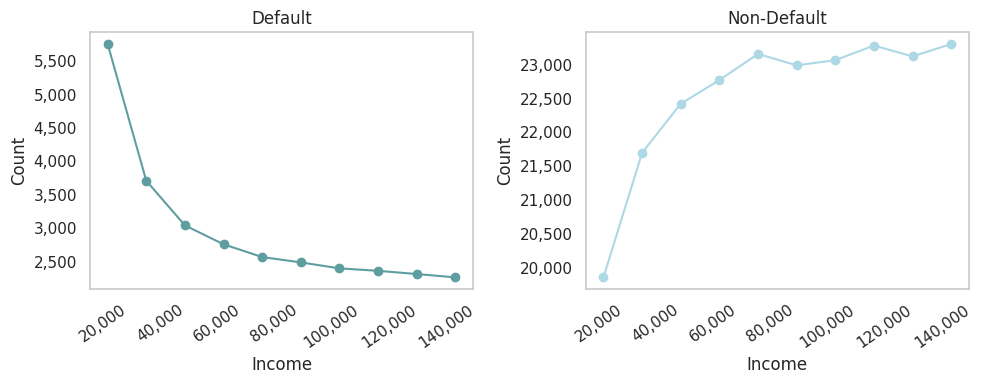

In [18]:
# Calcular valores para Default
hist_values_default, bin_edges_default = np.histogram(loans[loans['Default'] == 1]['Income'], bins=10, density=False)
bin_centers_default = (bin_edges_default[:-1] + bin_edges_default[1:]) / 2

# Calcular valores para Non-Default
hist_values_nondefault, bin_edges_nondefault = np.histogram(loans[loans['Default'] == 0]['Income'], bins=10, density=False)
bin_centers_nondefault = (bin_edges_nondefault[:-1] + bin_edges_nondefault[1:]) / 2

# Crear figura con dos subplots
plt.figure(figsize=(10, 4))

# Gráfico de líneas para Default
plt.subplot(1, 2, 1)
plt.plot(bin_centers_default, hist_values_default, marker='o', linestyle='-', color='cadetblue')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Default')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', rotation=35)
plt.grid(False)

# Gráfico de líneas para Non-Default
plt.subplot(1, 2, 2)
plt.plot(bin_centers_nondefault, hist_values_nondefault, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Non-Default')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', rotation=35)
plt.grid(False)

plt.tight_layout()
plt.show()

**¿Cómo se correlaciona la variable objetivo Default con las demás variables?**

Existe una correlación positiva de Default con las variables LoanAmount, InterestRate, NumCreditLines, LoanTerm y DTIRatio y una correlación negativa con Income, CreditScore y MonthsEmployed. Aunque por los valores, ninguna representa una relación significativa como para tener un impacto considerable en el desarrollo de los modelos. Es posible que el desbalanceo de clases mencionado anteriormente esté afectando los valores.

La correlación más significativa, aunque moderada, se encuentra con la variable Age, con un valor de -0,17. Esto implica una correlación negativa, es decir, que sugiere que las personas de mayor edad tienden a incumplir menos en el pago de sus préstamos, lo cual es correcto en base al gráfico analizado anteriormente.

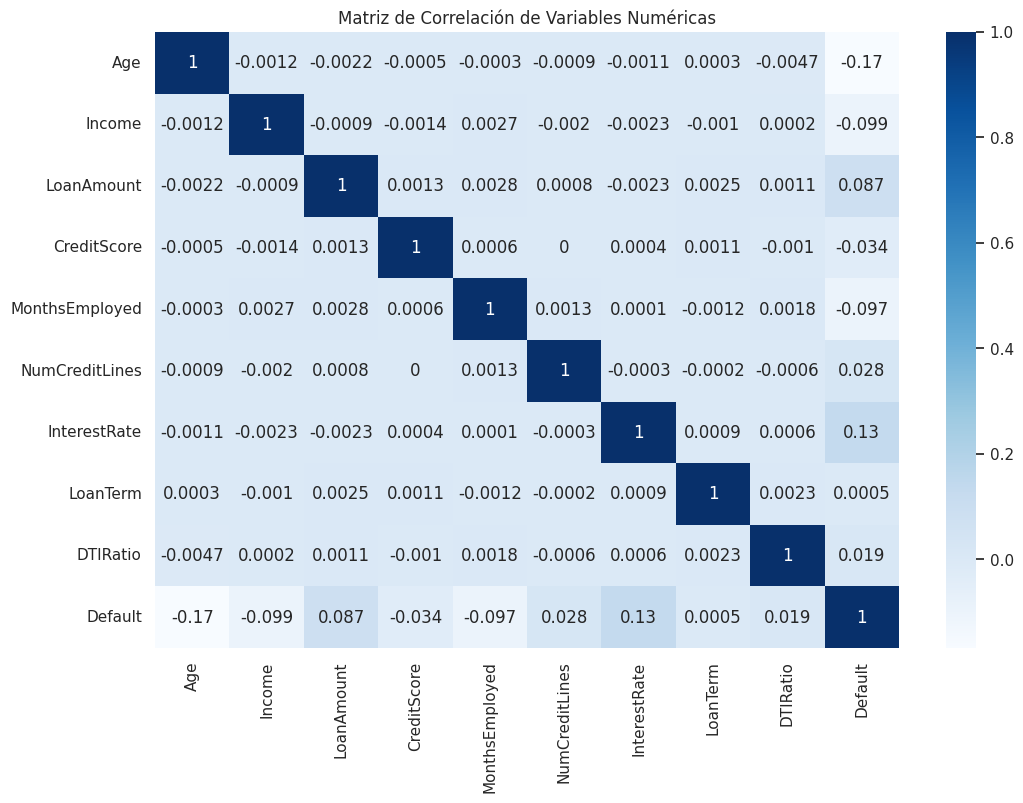

In [19]:
# Seleccionar variables numéricas
numerical_loans = loans.select_dtypes(include=['number'])

# Calcular matriz de correlación
correlation_matrix = numerical_loans.corr().round(4)

# Graficar
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

1. Conversión de variables categóricas (con más de dos categorías) en dummies

In [20]:
loans = pd.get_dummies(loans, columns=['EmploymentType', 'MaritalStatus', 'LoanPurpose'])
loans.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,True,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,True,False,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,True,True,False,False,True,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,True,False,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,True,True,False,False,True,False,False,False,False


2. Conversión de variables categóricas de dos categorías en binarias

In [21]:
from sklearn.preprocessing import LabelEncoder

columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
loans[columns]=loans[columns].apply(LabelEncoder().fit_transform)
loans.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,True,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,True,False,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,True,True,False,False,True,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,True,False,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,True,True,False,False,True,False,False,False,False


3. Conversión de variable categórica Education

In [22]:
# Se intentó aplicar Label Encoder pero el orden no era correcto, así que se hizo de forma manual

education_mapping = {
    'High School': 0,
    'Bachelor\'s': 1,
    'Master\'s': 2,
    'PhD': 3}

loans['Education'] = loans['Education'].replace(education_mapping)
loans.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,True,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,True,False,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,True,True,False,False,True,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,True,False,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,True,True,False,False,True,False,False,False,False


In [23]:
loans.shape

(255346, 27)

# **Feature Selection**

**Selección de variable objetivo y variables independientes**

In [24]:
X = loans.drop(['Default','LoanID'], axis=1)  #Se excluye LoanID ya que no es una variable significativa
y = loans['Default']

In [25]:
# Variables independientes
X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'HasMortgage', 'HasDependents', 'HasCoSigner',
       'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [26]:
# Variable objetivo
y

,Default
0,0
1,0
2,1
3,0
4,0
...,...
255341,1
255342,0
255343,1
255344,0


**Forward Selection**

Se eligió Forward Selection como método para seleccionar las variables predictoras más significativas para construir los modelos.
Para esto se tomó la métrica "recall" como criterio de evaluación ya que, al haber un desbalanceo de clases en el dataset, se intentará que los modelos identifiquen lo mejor posible los verdaderos casos positivos de "Default".

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector

# Crear un modelo de regresión logística
lr = LogisticRegression(max_iter=1000)

# Crear objeto sfs para Forward Selection
sfs = SequentialFeatureSelector(lr,
                                 k_features=7,
                                 forward=True,
                                 floating=False,
                                 scoring='recall',
                                 cv=0)

# Ajustar sfs a los datos de entrenamiento
sfs = sfs.fit(X, y)
sfs.k_feature_names_

('Age',
 'Income',
 'LoanAmount',
 'InterestRate',
 'Education',
 'HasCoSigner',
 'EmploymentType_Unemployed')

In [28]:
# Definir nuevamente X con las variables seleccionadas por el método Forward Selection y la variable "MonthsEmployed" que se considera relevante en base al EDA
selected_features = list(sfs.k_feature_names_) + ['MonthsEmployed']
X = loans[selected_features]
y = loans['Default']
X.head()

,Age,Income,LoanAmount,InterestRate,Education,HasCoSigner,EmploymentType_Unemployed,MonthsEmployed
0,56,85994,50587,15.23,1,1,False,80
1,69,50432,124440,4.81,2,1,False,15
2,46,84208,129188,21.17,2,0,True,26
3,32,31713,44799,7.07,0,0,False,0
4,60,20437,9139,6.51,1,0,True,8


# **Modelos**

**División de datos en conjuntos de entrenamiento y prueba**

In [29]:
# Definir datos de entrenamiento (70%) y datos de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (178742, 8)
y_train size: (178742,)
X_test size: (76604, 8)
y_test size: (76604,)


## **Árbol de decisión**

In [30]:
# Crear modelo de Árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Hacer predicciones
y_pred = dt.predict(X_test)

# Visualizar resultados
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67772
           1       0.20      0.22      0.21      8832

    accuracy                           0.81     76604
   macro avg       0.55      0.55      0.55     76604
weighted avg       0.82      0.81      0.81     76604



## **Regresión logística**

In [32]:
# Crear modelo de Regresión Logística
lr = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
# Hacer predicciones
y_pred = lr.predict(X_test)

# Visualizar resultados
print(classification_report(y_pred=y_pred, y_true=y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67772
           1       0.72      0.00      0.00      8832

    accuracy                           0.88     76604
   macro avg       0.80      0.50      0.47     76604
weighted avg       0.87      0.88      0.83     76604



## **Random Forest**

In [34]:
# Crear modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Hacer predicciones
y_pred = rf.predict(X_test)

# Visualizar resultados
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67772
           1       0.50      0.06      0.10      8832

    accuracy                           0.88     76604
   macro avg       0.70      0.52      0.52     76604
weighted avg       0.84      0.88      0.84     76604



## **KNN**

In [36]:
# Crear el modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# Hacer predicciones
y_pred = knn.predict(X_test)

# Visualizar resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67772
           1       0.26      0.05      0.08      8832

    accuracy                           0.87     76604
   macro avg       0.57      0.52      0.51     76604
weighted avg       0.82      0.87      0.83     76604



# **Optimización de modelo**

Al haber una cantidad significativamente menor de casos Default=1 que puede repercutir de forma negativa en el entrenamiento y rendimiento de los modelos, se va a aplicar la técnica SMOTE para solucionar el desbalanceo de clases.

SMOTE es una técnica de sobremuestreo que se utiliza para aumentar el número de casos minoritarios de un conjunto de datos. Para esto, se generan nuevas instancias sintéticas a partir de dichos casos minoritarios existentes, haciendo que la muestra sea más general y se equilibren ambas clases.

In [38]:
# Verificar desbalanceo clases
y.value_counts()

,count
Default,
0,225693
1,29653


<ipython-input-39-ba85515f8c92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  desbalanceo = sns.countplot(x=y, palette=['lightblue', 'cadetblue'])
<ipython-input-39-ba85515f8c92>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  desbalanceo.set_xticklabels(['Non-Default', 'Default'])


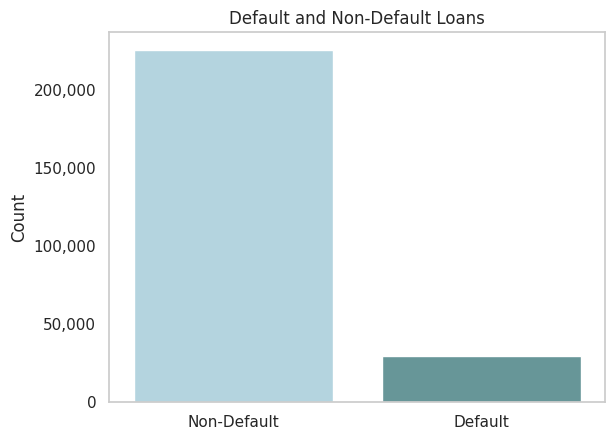

In [39]:
# Graficar desbalanceo de clases
desbalanceo = sns.countplot(x=y, palette=['lightblue', 'cadetblue'])
desbalanceo.set(title='Default and Non-Default Loans', ylabel ='Count', xlabel='')
desbalanceo.set_xticklabels(['Non-Default', 'Default'])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(False);

In [40]:
# Aplicar SMOTE para balancear clases
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled).round()

In [41]:
# Variables independientes
X_resampled

,Age,Income,LoanAmount,InterestRate,Education,HasCoSigner,EmploymentType_Unemployed,MonthsEmployed
0,56,85994,50587,15.0,1,1,False,80
1,69,50432,124440,5.0,2,1,False,15
2,46,84208,129188,21.0,2,0,True,26
3,32,31713,44799,7.0,0,0,False,0
4,60,20437,9139,7.0,1,0,True,8
...,...,...,...,...,...,...,...,...
451381,22,93657,24738,14.0,0,0,False,24
451382,52,21991,134906,22.0,1,0,True,98
451383,27,149876,94232,11.0,0,0,True,99
451384,31,97027,98228,7.0,3,1,False,35


In [42]:
# Variable objetivo balanceada
y_resampled.value_counts()

,count
Default,
0,225693
1,225693


<ipython-input-43-3bad2b40aca8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_smote = sns.countplot(x=y_resampled, palette=['lightblue', 'cadetblue'])
<ipython-input-43-3bad2b40aca8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico_smote.set_xticklabels(['Non-Default', 'Default'])


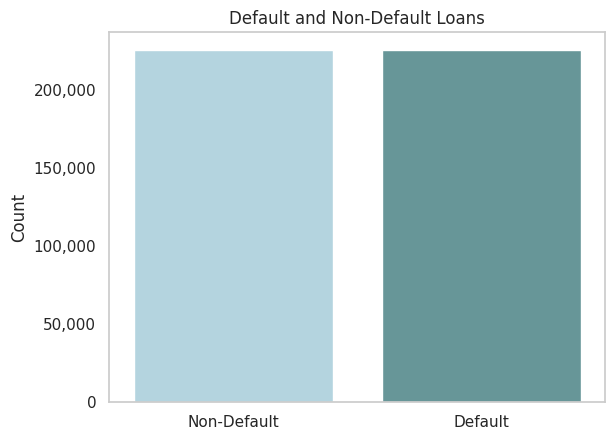

In [43]:
# Graficar clases luego de SMOTE
grafico_smote = sns.countplot(x=y_resampled, palette=['lightblue', 'cadetblue'])
grafico_smote.set(title='Default and Non-Default Loans', ylabel ='Count', xlabel='')
grafico_smote.set_xticklabels(['Non-Default', 'Default'])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(False);

## **Random Forest**

In [44]:
# Definir datos de entrenamiento (70%) y datos de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)

In [45]:
# Crear un modelo Random Forest ya que se considera que es el que obtuvo mejores métricas
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Hacer predicciones
y_pred = rf.predict(X_test)

# Visualizar resultados
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     67655
           1       0.80      0.83      0.82     67761

    accuracy                           0.81    135416
   macro avg       0.81      0.81      0.81    135416
weighted avg       0.81      0.81      0.81    135416



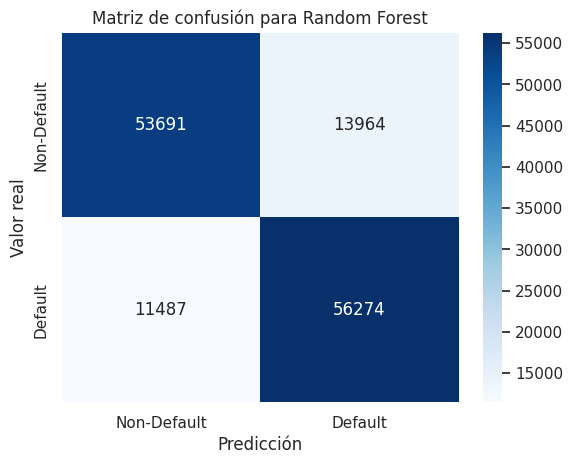

In [47]:
# Graficar la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')

g.set(title='Matriz de confusión para Random Forest', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['Non-Default', 'Default'])
g.set_yticklabels(['Non-Default', 'Default'])

plt.show()

# **Conclusiones**

Luego de evaluar el desempeño de los cuatro modelos de aprendizaje (Random Forest, Árbol de Decisión, Regresión Logística y KNN) y de analizar las métricas de cada uno, se puede determinar que aunque todos tuvieron un buen rendimiento en cuanto a exactitud global (por arriba del 80%) y buenas métricas para casos de Default = 0 (Non-Default), todos fallaron en obtener buenos resultados para los casos de Default = 1, lo cual significa que ningún modelo pudo predecir de forma satisfactoria los verdaderos positivos, es decir, los casos reales de incumplimiento de los préstamos.

Esto ocurrió porque en el conjunto de datos había un desbalanceo de clases, siendo Default la clase con una cantidad significativamente menor de datos. Por este motivo, se decidió aplicar la técnica SMOTE para balancear ambas clases permitiendo optimizar el modelo y hacer una predicción en base a datos equilibrados.

El resultado de esto fue una exactitud global del 81%, una precisión del 82% para la clase 0 y del 80% para la clase 1 y un recall del 79% y 83% respectivamente, mejorando ampliamente las métricas iniciales para Default = 1. Esto implica que el modelo de Random Forest luego de aplicar SMOTE tuvo un rendimiento más que satisfactorio, pudiendo predecir eficientemente tanto los casos positivos como negativos de Default, convirtiéndose en una herramienta sólida de predicción.